```{contents}

```

# P-Value, CI and α

## P-Value

* **Definition**:
  The **p-value** is the probability of observing the given data (or something more extreme) if the **null hypothesis** is true.
  It helps decide whether to **reject or fail to reject the null hypothesis**.

* **Example (coin toss)**:

  * Null hypothesis (H₀): Coin is fair.
  * Alternate hypothesis (H₁): Coin is not fair.
  * Toss coin 100 times → Expect \~50 heads.
  * If result falls too far from expectation (e.g., 70 heads), it suggests unfairness.

* **Confidence interval & significance level (α)**:

  * Significance level (e.g., α = 0.05) is set by domain experts.
  * Corresponds to a **95% confidence interval** (area under the curve).
  * Extreme tails (2.5% each) are **rejection regions**.

* **Decision rule**:

  * If **p-value < α** → Reject the null hypothesis (evidence against H₀).
  * If **p-value ≥ α** → Fail to reject the null hypothesis (no strong evidence against H₀).

```{note}
If you'd like to know about z-score table
[Z-score table](https://www.ztable.net/)
```

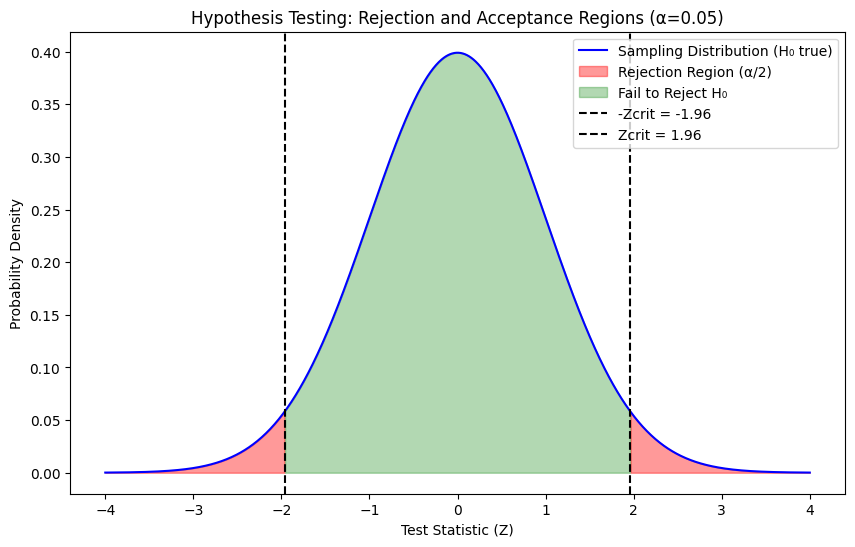

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parameters
mu = 0
sigma = 1
alpha = 0.05
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

# Critical values for rejection regions
z_crit = norm.ppf(1 - alpha/2)
reject_left = x < -z_crit
reject_right = x > z_crit

plt.figure(figsize=(10,6))

# Plot the normal distribution
plt.plot(x, y, label='Sampling Distribution (H₀ true)', color='blue')

# Shade rejection regions
plt.fill_between(x, y, where=reject_left, color='red', alpha=0.4, label='Rejection Region (α/2)')
plt.fill_between(x, y, where=reject_right, color='red', alpha=0.4)

# Shade acceptance region
plt.fill_between(x, y, where=(~reject_left & ~reject_right), color='green', alpha=0.3, label='Fail to Reject H₀')

# Mark critical values
plt.axvline(-z_crit, color='black', linestyle='--', label=f'-Zcrit = {-z_crit:.2f}')
plt.axvline(z_crit, color='black', linestyle='--', label=f'Zcrit = {z_crit:.2f}')

# Labels and title
plt.title('Hypothesis Testing: Rejection and Acceptance Regions (α=0.05)')
plt.xlabel('Test Statistic (Z)')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


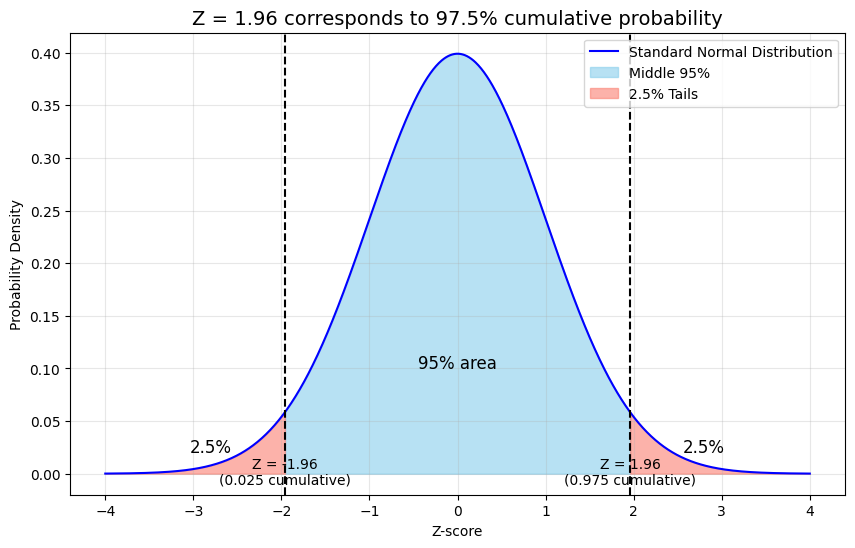

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define x range for standard normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)

# Critical Z value
z_critical = 1.96

# Plot the normal distribution curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Standard Normal Distribution", color="blue")

# Shade the middle 95%
x_fill = np.linspace(-z_critical, z_critical, 500)
y_fill = norm.pdf(x_fill, 0, 1)
plt.fill_between(x_fill, y_fill, color="skyblue", alpha=0.6, label="Middle 95%")

# Shade the tails (2.5% each)
x_left = np.linspace(-4, -z_critical, 300)
y_left = norm.pdf(x_left, 0, 1)
plt.fill_between(x_left, y_left, color="salmon", alpha=0.6, label="2.5% Tails")

x_right = np.linspace(z_critical, 4, 300)
y_right = norm.pdf(x_right, 0, 1)
plt.fill_between(x_right, y_right, color="salmon", alpha=0.6)

# Add vertical lines for critical values
plt.axvline(-z_critical, color="black", linestyle="--")
plt.axvline(z_critical, color="black", linestyle="--")

# Annotations
plt.text(0, 0.1, "95% area", fontsize=12, ha="center")
plt.text(-2.8, 0.02, "2.5%", fontsize=12, ha="center")
plt.text(2.8, 0.02, "2.5%", fontsize=12, ha="center")
plt.text(z_critical, -0.01, "Z = 1.96\n(0.975 cumulative)", ha="center", fontsize=10)
plt.text(-z_critical, -0.01, "Z = -1.96\n(0.025 cumulative)", ha="center", fontsize=10)

# Labels and title
plt.title("Z = 1.96 corresponds to 97.5% cumulative probability", fontsize=14)
plt.xlabel("Z-score")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



## Confidence Interval (CI)

A **confidence interval** is a range of values, derived from sample data, that is likely to contain the true population parameter (e.g., mean, proportion) with a certain level of confidence.

* Example: *A 95% confidence interval for the mean weight of students is (60, 70) kg.*
  → This means: if we repeated the study many times, about **95% of the calculated intervals would contain the true mean**.

### Key points:

* It is **not** a probability that the parameter is in the interval (the parameter is fixed; the interval varies across samples).
* Wider intervals = more uncertainty.
* Narrower intervals = more precision (usually with larger sample sizes).

---

## Significance Level (α)

The **significance level (alpha, α)** is the threshold used in hypothesis testing to decide whether to reject the null hypothesis.

* Common values: **0.05 (5%)**, **0.01 (1%)**.
* It represents the **probability of making a Type I error** (rejecting the null hypothesis when it’s actually true).

### Example:

* If α = 0.05 → we accept a **5% risk** of concluding an effect exists when it doesn’t.
* In a two-tailed test with α = 0.05, each tail has **2.5% area**.

---

## Relationship Between CI and α

Confidence interval and significance level are directly linked:

$$
\text{Confidence Level} = 1 - \alpha
$$

* A **95% confidence interval** corresponds to a **significance level α = 0.05**.
* A **99% confidence interval** corresponds to **α = 0.01**.

---

**Quick analogy:**

* **Confidence Interval** → Range of plausible values for the population parameter.
* **Significance Level (α)** → Cutoff for deciding if results are “statistically significant.”

